In [47]:
import pandas as pd
import numpy as np
import os

import seaborn as sns

## 1. 데이터 불러오기

- sales_train.csv: 2013.1~2015.10 일일 판매 데이터. 학습데이터.
- test.csv: 매출예측데이터(2015 11월)
- sample_submission.csv: 제출파일형식
- items.csv: 상품 정보 데이터
- item_categories.csv: 상품 종류 데이터
- shops.csv: 상점 정보 데이터

In [5]:
path = '../data/raw/'
lst = os.listdir(path)
print(lst)

item = pd.read_csv(path+'items.csv')
category = pd.read_csv(path+'item_categories.csv')
shops = pd.read_csv(path+'shops.csv')

sample = pd.read_csv(path+'sample_submission.csv')
test = pd.read_csv(path+'test.csv')

sales_train = pd.read_csv(path+'sales_train.csv')

['items.csv', 'item_categories.csv', 'item_categories_kor.csv', 'sales_train.csv', 'sample_submission.csv', 'shops.csv', 'test.csv']


### 1.1 item_categories
- item_category_name: 상품종류 명
- item_category_id: 상품종류식별번호

In [6]:
category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
# 아이템카테고리 : 84
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


### 1.2 shops
- shops_name: 가게명
- shop_id: 가게식별번호

In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
# shop : 60개
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### 1.3 items
- item_name: 상품명
- item_id: 상품식별 아이디
- item_category_id: 상품종류식별번호

In [10]:
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
# 아이템 개수 22170개
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


### 1.4 test
- shop_id, item_id별 2015년 11월 판매량을 예측해야함. (인덱스는 ID)

In [12]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


### 1.5 sample_submisson
- test의 아이디에 해당하는 판매량을 기입.

In [13]:
sample.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


### 1.6 sales_train
- date: 작성일자
- date_block_num: 작성일의 편의를 위해 사용되는 연속 월번호(1월,2월 3월 = 0,1,2)
- shop_id: 상점식별번호
- item_id: 상품식별번호
- item_price: 상품가격
- item_cnt_day: 상품판매량. 음값은 환불로 가정

In [14]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [15]:
sales_train.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [16]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


#### box plot

<AxesSubplot:>

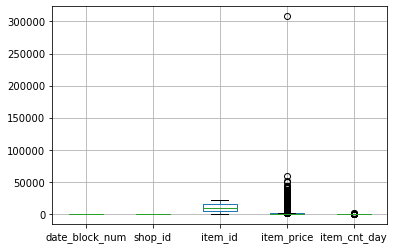

In [17]:
sales_train.boxplot()

<AxesSubplot:>

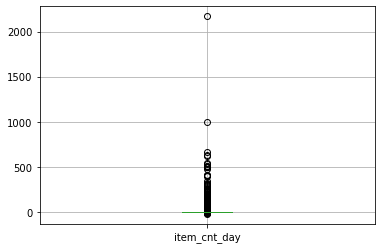

In [21]:
sales_train[['item_cnt_day']].boxplot()

<AxesSubplot:>

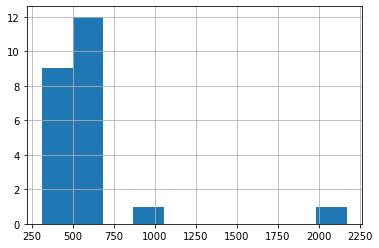

In [50]:
sales_train.item_cnt_day[ sales_train.item_cnt_day > 300].hist()

In [60]:
sales_train[sales_train.item_cnt_day > 500]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1573253,22.04.2014,15,27,8057,1200.000000,502.0
1708207,28.06.2014,17,25,20949,5.000000,501.0
2048518,02.10.2014,21,12,9242,1500.000000,512.0
2067669,09.10.2014,21,55,19437,899.000000,508.0
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2608040,14.04.2015,27,12,3731,1904.548077,624.0
2626181,19.05.2015,28,12,11373,155.192950,539.0
2851073,29.09.2015,32,55,9249,1500.000000,533.0
2851091,30.09.2015,32,55,9249,1702.825746,637.0
2864235,30.09.2015,32,12,9248,1692.526158,669.0


In [69]:
sales_train[sales_train.item_id==11373]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,08.01.2013,0,12,11373,1000.00,1.0
58324,31.01.2013,0,12,11373,97.80,5.0
176790,01.02.2013,1,12,11373,229.00,1.0
176791,04.02.2013,1,12,11373,130.00,1.0
302468,29.03.2013,2,12,11373,139.50,2.0
...,...,...,...,...,...,...
2909829,07.10.2015,33,12,11373,855.00,2.0
2909830,06.10.2015,33,12,11373,208.80,5.0
2909831,05.10.2015,33,12,11373,140.75,16.0
2909832,02.10.2015,33,12,11373,648.50,2.0


In [65]:
sales_train[sales_train.item_cnt_day < 1].item_cnt_day.unique()

array([ -1.,  -5.,  -6.,  -3.,  -2.,  -4., -22., -16.,  -9.])

<AxesSubplot:>

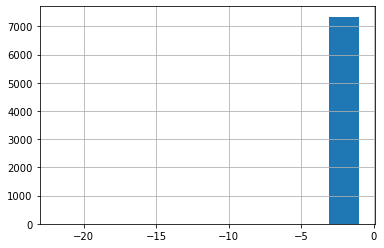

In [66]:
sales_train[sales_train.item_cnt_day < 1].item_cnt_day.hist()

<AxesSubplot:>

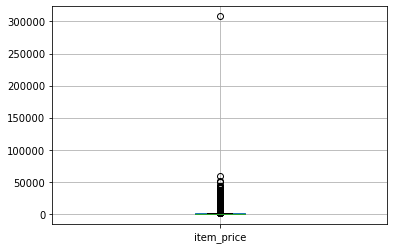

In [19]:
sales_train[['item_price']].boxplot()

#### hist

<AxesSubplot:>

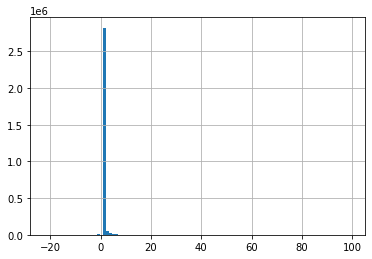

In [34]:
sales_train.item_cnt_day[sales_train.item_cnt_day < 100 ].hist(bins=100)

<AxesSubplot:>

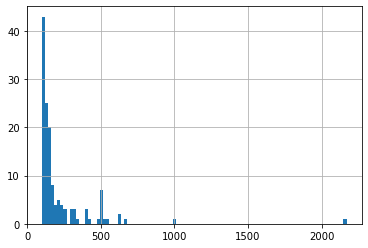

In [33]:
sales_train.item_cnt_day[sales_train.item_cnt_day > 100 ].hist(bins=100)

- 가격이 너무 다르다

<AxesSubplot:>

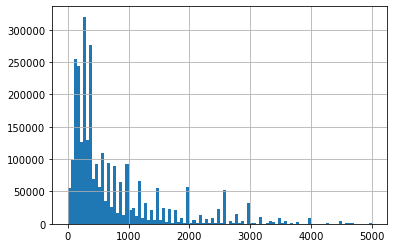

In [40]:
sales_train.item_price[ sales_train.item_price < 5000 ].hist(bins=100)

<AxesSubplot:>

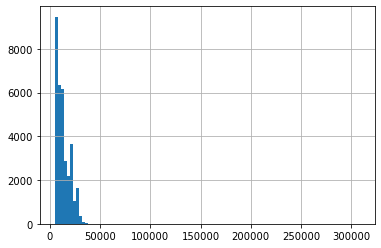

In [39]:
sales_train.item_price[ sales_train.item_price > 5000 ].hist(bins=100)

#### corr

<AxesSubplot:>

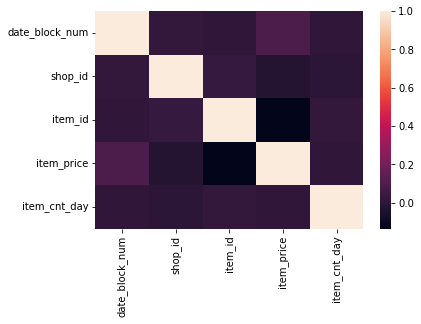

In [48]:
# raw data 상으로는 연관관계가 전혀 없음.
sns.heatmap(sales_train.corr())